<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/CV/3_CNN_Modernas/1_Redes_Convolucionales.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>


# Redes Convolucionales Modernas

Ahora que comprendemos los conceptos básicos del armado de las CNN, hagamos un recorrido por las arquitecturas CNN modernas. Este recorrido es, por necesidad, incompleto, gracias a la plétora de nuevos y emocionantes diseños que se agregan. Su importancia deriva del hecho de que no solo se pueden usar directamente para tareas de visión, sino que también sirven como generadores de características básicas para tareas más avanzadas como el seguimiento (tracking), la segmentación, detección de objetos o transferencia de estilos.

En este notebook, la mayoría de las secciones corresponden a una arquitectura CNN significativa que fue en algún momento (o actualmente) el modelo base sobre el cual se construyeron muchos proyectos de investigación y sistemas implementados. Cada una de estas redes fue brevemente una arquitectura dominante y muchas fueron ganadoras o finalistas en la competencia ImageNet, que ha servido como un barómetro del progreso en el aprendizaje supervisado en visión por computadora desde 2010. Solo recientemente los transformer comenzaron a desplazar a las CNN. Cubriremos este desarrollo en la segunda parte de esta clase.

Si bien la idea de las redes neuronales profundas es bastante simple (apilar un montón de capas), el rendimiento puede variar enormemente según las arquitecturas y las opciones de hiperparámetros. Las redes neuronales descritas en este capítulo son el producto de la intuición, algunos conocimientos matemáticos y mucho ensayo y error. Presentamos estos modelos en orden cronológico, en parte para transmitir un sentido de la historia para que pueda formar sus propias intuiciones sobre hacia dónde se dirige el campo y tal vez desarrollar sus propias arquitecturas. Por ejemplo, la normalización por lotes y las conexiones residuales descritas en esta clase han ofrecido dos ideas populares para entrenar y diseñar modelos profundos, las cuales también se han aplicado desde entonces a arquitecturas más allá de la visión por computadora.



## Computer Vision Pre-ImageNet

Aunque las CNN eran bien conocidas en las comunidades de visión por computadora y aprendizaje automático después de la introducción de LeNet (LeCun et al., 1995), no dominaron inmediatamente el campo. Aunque LeNet logró buenos resultados en los primeros conjuntos de datos pequeños, aún no se había establecido el rendimiento y la viabilidad de entrenar las CNN en conjuntos de datos más grandes y realistas. De hecho, durante gran parte del tiempo transcurrido entre principios de la década de 1990 y los resultados decisivos de 2012 (Krizhevsky et al., 2012), las redes neuronales a menudo fueron superadas por otros métodos de aprendizaje automático, como los métodos kernel (Schölkopf y Smola, 2002). , métodos de ensamble (Freund et al., 1996) y estimación estructurada (Taskar et al., 2004).

Para la visión por computadora, esta comparación quizás no sea del todo precisa. Es decir, aunque las entradas a las redes convolucionales consisten en valores de píxeles sin procesar o ligeramente procesados ​​(por ejemplo, centrados), los profesionales nunca introducirían píxeles sin procesar en los modelos tradicionales. En cambio, los pipelines típicos de visión por computadora consistían en una ingeniería de extracción de características manual, como SIFT (Lowe, 2004), SURF (Bay et al., 2006) y bolsas de palabras visuales (Sivic y Zisserman, 2003). En lugar de aprender las características, las características fueron diseñadas. La mayor parte del progreso provino de tener ideas más inteligentes para la extracción de características, por un lado, y una comprensión más profunda de la geometría (Hartley y Zisserman, 2000), por el otro. El algoritmo de aprendizaje a menudo pasaba a un segundo plano.



Aunque algunos aceleradores de redes neuronales estaban disponibles en la década de 1990, aún no eran lo suficientemente potentes como para crear CNN multicanal y multicapa profundas con una gran cantidad de parámetros. Por ejemplo, la GeForce 256 de NVIDIA de 1999 pudo procesar como máximo 480 millones de operaciones por segundo (MFLOP), sin ningún marco de programación significativo para operaciones más allá de los juegos. Los aceleradores actuales pueden rendir más de 300 TFLOP por dispositivo (NVIDIA's Ampere A100). Tenga en cuenta que los FLOP son operaciones de punto flotante, como multiplicaciones y sumas. Además, los conjuntos de datos aún eran relativamente pequeños: OCR con 60 000 imágenes de $28x28$ píxeles se consideró una tarea muy desafiante. A estos obstáculos se suman trucos clave para entrenar redes neuronales que incluyen heurísticas de inicialización de parámetros (Glorot y Bengio, 2010), variantes inteligentes de descenso de gradiente estocástico (Kingma y Ba, 2014), funciones de activación sin aplastamiento (Nair y Hinton, 2010), y aún faltaban técnicas de regularización efectivas (Srivastava et al., 2014).

Por lo tanto, en lugar de entrenar sistemas de extremo a extremo (del píxel a la clasificación), las canalizaciones clásicas se parecían más a esto:

* Obtener un conjunto de datos interesante. En los primeros días, estos conjuntos de datos requerían sensores costosos. Por ejemplo, el Apple QuickTake 100 de 1994 lucía una increíble resolución de 0,3 megapíxeles (VGA), capaz de almacenar hasta 8 imágenes, todo por el precio de 1000 dólares.

* Preprocesar el conjunto de datos con características hechas a mano basadas en algunos conocimientos de óptica, geometría, otras herramientas analíticas y, ocasionalmente, en los descubrimientos fortuitos de afortunados estudiantes graduados.

* Alimentar los datos a través de un conjunto estándar de extractores de características, como SIFT (transformación de características invariantes de escala) (Lowe, 2004), SURF (características robustas aceleradas) (Bay et al., 2006), o cualquier otro extractor de características diseñadas por humanos. ¡OpenCV todavía proporciona extractores SIFT hasta el día de hoy!

* Vuelque las representaciones resultantes en su clasificador favorito, probablemente un modelo lineal o método kernel, para entrenar un clasificador.

![Imgur](https://i.imgur.com/oEfNDe9.png)

Si hubiera podido hablar con investigadores de aprendizaje automático en ese momento, le habrían dicho que el aprendizaje automático era importante y hermoso. Las teorías elegantes demostraron las propiedades de varios clasificadores (Boucheron et al., 2005) y la optimización convexa (Boyd y Vandenberghe, 2004) se convirtió en el pilar para obtenerlos. El campo del aprendizaje automático era próspero, riguroso y eminentemente útil. Sin embargo, si hubiera podido hablar con un investigador de visión por computadora, escucharía una historia muy diferente. La sucia verdad del reconocimiento de imágenes, le dirían, es que las características, la geometría (Hartley y Zisserman, 2000, Hartley y Kahl, 2009) y la ingeniería, en lugar de nuevos algoritmos de aprendizaje, impulsaron el progreso. Los investigadores de visión por computadora creían justificadamente que un conjunto de datos un poco más grande o más limpio o una canalización de extracción de características ligeramente mejorada importaba mucho más para la precisión final que cualquier algoritmo de aprendizaje.

# ImageNet

Los modelos profundos con muchas capas requieren grandes cantidades de datos para entrar en el régimen en el que superan significativamente a los métodos tradicionales basados ​​en optimizaciones convexas (p. ej., métodos lineales y kernel). Sin embargo, dada la limitada capacidad de almacenamiento de las computadoras, el costo relativo de los sensores (de imágenes) y los presupuestos de investigación comparativamente más ajustados en la década de 1990, la mayoría de las investigaciones se basaron en pequeños conjuntos de datos. Numerosos artículos se basaron en la colección de conjuntos de datos de UCI, muchos de los cuales contenían solo cientos o (algunos) miles de imágenes capturadas en baja resolución y, a menudo, con un fondo artificialmente limpio.

En 2009, se lanzó el conjunto de datos de ImageNet (Deng et al., 2009), desafiando a los investigadores a aprender modelos a partir de 1 millón de ejemplos, 1000 imágenes de cada una de las 1000 categorías distintas de objetos. Las categorías mismas se basaron en los nodos de sustantivos más populares en WordNet (Miller, 1995). El equipo de ImageNet usó la búsqueda de imágenes de Google para prefiltrar grandes conjuntos de fotos candidatas para cada categoría y empleó un servicio de crowdsourcing de Amazon para confirmar si cada imagen pertenecía a la categoría asociada. Esta escala no tenía precedentes, superando a otras en más de un orden de magnitud (por ejemplo, CIFAR-100 tiene 60 000 imágenes).

![Imgur](https://i.imgur.com/cDEpuZm.png)

Otro aspecto fue que las imágenes tenían una resolución relativamente alta de $224x224$ píxeles, a diferencia del conjunto de datos TinyImages de 80 millones de tamaño $32x32$ píxeles. Esto permitió la formación de características de nivel superior. La competencia asociada, denominada Desafío de reconocimiento visual a gran escala de ImageNet (Russakovsky et al., 2015), impulsó la investigación de la visión por computadora y el aprendizaje automático, desafiando a los investigadores a identificar qué modelos funcionaron mejor a una escala mayor de lo que los académicos habían considerado previamente. Los conjuntos de datos de visión más grandes, como LAION-5B (Schuhmann et al., 2022) contienen miles de millones de imágenes con metadatos adicionales.

![Imgur](https://i.imgur.com/7MQ402c.png)

# AlexNet

Los modelos de aprendizaje profundo son consumidores voraces de ciclos de cómputo. El entrenamiento puede tomar cientos de épocas, y cada iteración requiere pasar datos a través de muchas capas de operaciones de álgebra lineal computacionalmente costosas. Esta es una de las razones principales por las que en la década de 1990 y principios de la de 2000, se preferían algoritmos simples basados ​​en objetivos convexos optimizados de manera más eficiente.

Las unidades de procesamiento gráfico (GPU) demostraron ser un cambio de juego al hacer factible el aprendizaje profundo. Estos chips se habían desarrollado durante mucho tiempo para acelerar el procesamiento de gráficos en beneficio de los juegos de computadora. En particular, se optimizaron para un alto rendimiento en productos de matriz-vector de $4x4$, que son necesarios para muchas tareas de gráficos por computadora. Afortunadamente, las matemáticas son sorprendentemente similares a las requeridas para calcular capas convolucionales. Por esa época, NVIDIA y ATI habían comenzado a optimizar las GPU para operaciones informáticas generales (Fernando, 2004), llegando incluso a comercializarlas como GPU de propósito general (GPGPU).

Volvamos a 2012. Un gran avance se produjo cuando Alex Krizhevsky e Ilya Sutskever implementaron una CNN profunda que podía ejecutarse en GPU. Se dieron cuenta de que los cuellos de botella computacionales en las CNN, las convoluciones y las multiplicaciones de matrices son operaciones que podrían paralelizarse en hardware. Utilizando dos NVIDIA GTX 580 con 3 GB de memoria, cualquiera de las cuales tenía capacidad para 1,5 TFLOP (todavía un desafío para la mayoría de las CPU una década después), implementaron convoluciones rápidas. El código cuda-convnet fue lo suficientemente bueno como para que durante varios años fuera el estándar de la industria e impulsó los primeros dos años del auge del aprendizaje profundo.

AlexNet, que empleó una CNN de 8 capas, ganó el ImageNet Large Scale Visual Recognition Challenge 2012 por un amplio margen (Russakovsky et al., 2013). Esta red demostró, por primera vez, que las características obtenidas mediante el aprendizaje pueden trascender las características diseñadas manualmente, rompiendo el paradigma anterior en visión artificial.

Las arquitecturas de AlexNet y LeNet son sorprendentemente similares, como ilustra la figura 8.1.2. Tenga en cuenta que proporcionamos una versión ligeramente optimizada de AlexNet que elimina algunas de las peculiaridades de diseño que se necesitaban en 2012 para que el modelo se ajuste a dos GPU pequeñas.

![Imgur](https://i.imgur.com/vNR46yu.png)


También existen diferencias significativas entre AlexNet y LeNet. Primero, AlexNet es mucho más profunda que el comparativamente pequeño LeNet5. AlexNet consta de ocho capas: cinco capas convolucionales, dos capas densas ocultas y una capa densa de salida. En segundo lugar, AlexNet usó ReLU en lugar de la sigmoida como función de activación. Profundicemos en los detalles a continuación.

### Arquitectura

En la primera capa de AlexNet, la forma de la ventana de convolución es
$11\times11$. Dado que las imágenes en ImageNet son ocho veces más altas y más anchas que las imágenes MNIST, los objetos en los datos de ImageNet tienden a ocupar más píxeles con más detalles visuales. En consecuencia, se necesita una ventana de convolución más grande para capturar el objeto. La forma de la ventana de convolución en la segunda capa se reduce a $5\times5$, seguida de $3\times3$. Además, después de las capas convolucionales primera, segunda y quinta, la red agrega capas de max-pooling con una forma de ventana de $3\times3$ y un stride de 2. Además, AlexNet tiene diez veces más canales de convolución que LeNet.

Después de la última capa convolucional, hay dos enormes capas densas con 4096 neuronas de salida. Estas capas requieren parámetros de modelo de casi 1 GB. Debido a la memoria limitada en las primeras GPU, la AlexNet original usaba un diseño de flujo de datos dual, de modo que cada una de sus dos GPU podría ser responsable de almacenar y calcular solo la mitad del modelo. Afortunadamente, la memoria de GPU es comparativamente abundante ahora, por lo que rara vez necesitamos dividir modelos en GPU en estos días (nuestra versión del modelo de AlexNet se desvía del paper original en este aspecto).



In [ ]:
import torch
from torch import nn

def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(init_cnn)

    def forward(self, X):
        return self.net(X)

### Funciones de activación




Además, AlexNet cambió la función de activación sigmoidea a una función de activación ReLU más simple. Por un lado, el cálculo de la función de activación de ReLU es más sencillo. Por ejemplo, no tiene la operación de exponenciación que se encuentra en la función de activación sigmoidea. Por otro lado, la función de activación de ReLU facilita el entrenamiento del modelo cuando se utilizan diferentes métodos de inicialización de parámetros. Esto se debe a que, cuando la salida de la función de activación sigmoidea está muy cerca de 0 o 1, el gradiente de estas regiones es casi 0, por lo que el backpropagation no puede continuar actualizando algunos de los parámetros del modelo. Por el contrario, el gradiente de la función de activación de ReLU en el intervalo positivo siempre es 1. Por lo tanto, si los parámetros del modelo no se inicializan correctamente, la función sigmoidea puede obtener un gradiente de casi 0 en el intervalo positivo, por lo que el modelo no se puede entrenar de manera efectiva.

![](https://miro.medium.com/max/1400/1*XxxiA0jJvPrHEJHD4z893g.png)

### Image Augmentation

Para aumentar aún más los datos, el ciclo de entrenamiento de AlexNet agregó una gran cantidad de aumentación de imágenes, como volteo, recorte y cambios de color. Esto hace que el modelo sea más robusto y el tamaño de muestra más grande reduce efectivamente el sobreajuste.

El aumento de imágenes genera ejemplos de entrenamiento similares pero distintos después de una serie de cambios aleatorios en las imágenes de entrenamiento, lo que amplía el tamaño del conjunto de entrenamiento. Alternativamente, el aumento de la imagen puede estar motivado por el hecho de que los ajustes aleatorios de los ejemplos de entrenamiento permiten que los modelos dependan menos de ciertos atributos, mejorando así su capacidad de generalización. Por ejemplo, podemos recortar una imagen de diferentes maneras para que el objeto de interés aparezca en diferentes posiciones, reduciendo así la dependencia de un modelo de la posición del objeto. También podemos ajustar factores como el brillo y el color para reducir la sensibilidad de un modelo al color. Probablemente sea cierto que el aumento de imágenes fue indispensable para el éxito de AlexNet en ese momento. En esta sección discutiremos esta técnica ampliamente utilizada en visión artificial.

In [ ]:
%matplotlib inline
import torch
import torchvision
from torch import nn


En nuestra investigación de los métodos comunes de aumento de imágenes, utilizaremos la siguiente imagen de $400\times 500$ como ejemplo.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


'wget' is not recognized as an internal or external command,
operable program or batch file.


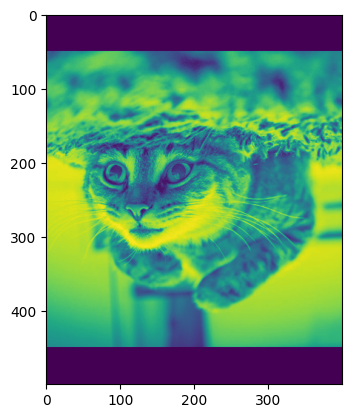

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
from torchvision.io import read_image
!wget https://i.imgur.com/qkkkmHf.jpg
img = read_image('content\\qkkkmHf.jpeg')
imgplot = plt.imshow(img.permute(1,2,0))
plt.show()

La mayoría de los métodos de aumento de imágenes tienen un cierto grado de aleatoriedad. Para que nos resulte más fácil observar el efecto del aumento de imagen, a continuación definimos una función auxiliar `apply`. Esta función ejecuta el método de aumento de imagen aug varias veces en la imagen de entrada `img` y muestra todos los resultados.


In [ ]:
import torchvision.transforms as T
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        try:
            img = T.ToPILImage()(img.to('cpu'))
        except:
            pass
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [ ]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale=scale)

#### Voltear y recortar

Voltear la imagen en dirección horizontal generalmente no cambia la categoría del objeto. Este es uno de los primeros y más utilizados métodos de aumento de imágenes. A continuación, usamos el módulo `transforms` de PyTorch para crear la instancia `RandomHorizontalFlip`, que voltea una imagen de izquierda a derecha con un 50 % de probabilidad.

C:\Users\Fran\AppData\Local\Temp\ipykernel_4396\1479086237.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  apply(torch.tensor(img), torchvision.transforms.RandomHorizontalFlip())


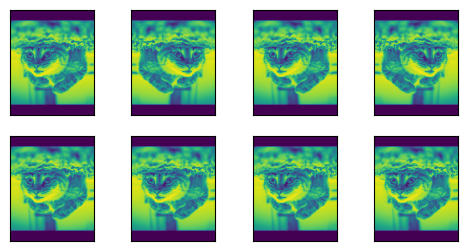

In [ ]:
#img_flip = torchvision.transforms.RandomHorizontalFlip()
#plt.imshow(img_flip(torch.tensor(img)))
apply(torch.tensor(img), torchvision.transforms.RandomHorizontalFlip())

Voltear verticalmente no es tan común como voltear horizontalmente. Pero al menos para esta imagen de ejemplo, voltear hacia arriba y hacia abajo no dificulta el reconocimiento.


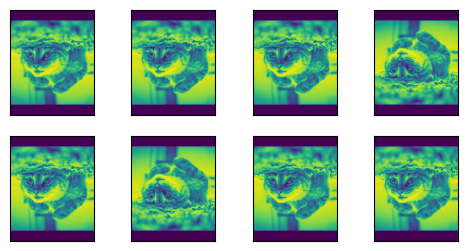

In [ ]:
apply(img, torchvision.transforms.RandomVerticalFlip())

En la imagen de ejemplo que usamos, el gato está en el medio de la imagen, pero este puede no ser el caso en general. En clases anteriores, explicamos que la capa de pooling puede reducir la sensibilidad de una capa convolucional a la posición de destino. Además, también podemos recortar aleatoriamente la imagen para que los objetos aparezcan en diferentes posiciones de la imagen a diferentes escalas, lo que también puede reducir la sensibilidad de un modelo a la posición de destino.

En el siguiente código, **recortamos al azar** una región con un área de $10\% \sim 100\%$ del área original cada vez, y la relación entre el ancho y el alto de esta área se selecciona al azar entre $0.5 \sim 2$. Luego, el ancho y el alto de la región se escalan a 200 píxeles.
A menos que se especifique lo contrario, el número aleatorio entre $a$ y $b$ en esta sección se refiere a un valor continuo obtenido por muestreo aleatorio y uniforme del intervalo $[a, b]$.


d:\Users\Fran\.conda\envs\yolo\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


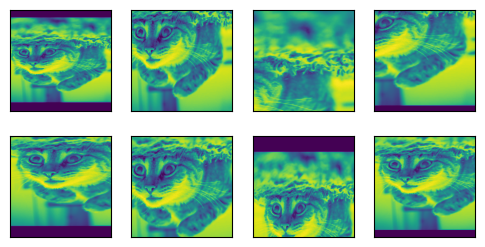

In [ ]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

#### Cambio de colores

Otro método de aumento es el cambio de colores. Podemos cambiar cuatro aspectos del color de la imagen: brillo, contraste, saturación y tono. En el siguiente ejemplo, [**cambiamos aleatoriamente el brillo**] de la imagen a un valor entre el 50% ($1-0.5$) y el 150% ($1+0.5$) de la imagen original.


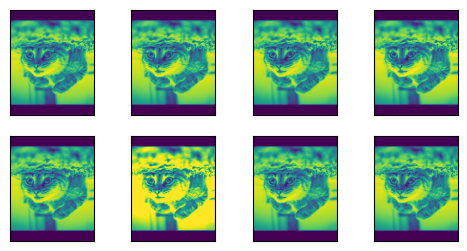

In [ ]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

Del mismo modo, podemos **cambiar aleatoriamente el tono** de la imagen.


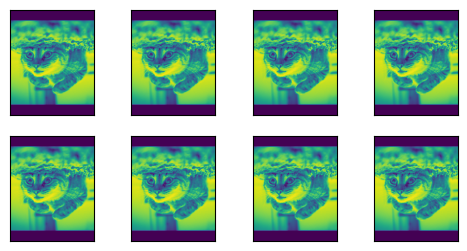

In [ ]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

También podemos crear una instancia de RandomColorJitter y configurar cómo cambiar aleatoriamente el brillo, el contraste, la saturación y el tono de la imagen al mismo tiempo.


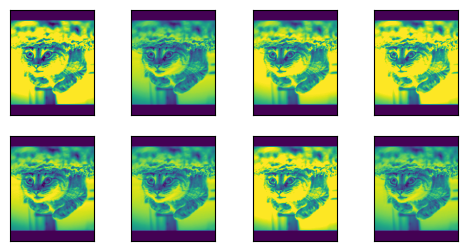

In [ ]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

#### Combinación de varios métodos de aumento de imágenes

En la práctica, **combinaremos múltiples métodos de aumento de imágenes**. Por ejemplo, podemos combinar los diferentes métodos de aumento de imágenes definidos anteriormente y aplicarlos a cada imagen a través de una instancia `Compose`.

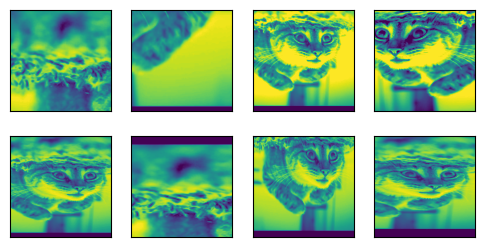

In [ ]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

### Entrenamiento

Aunque AlexNet se entrenó en ImageNet, aquí usamos Fashion-MNIST, ya que entrenar un modelo de ImageNet para la convergencia podría llevar horas o días, incluso en una GPU moderna.
Uno de los problemas de aplicar AlexNet directamente en [**Fashion-MNIST**] es que sus **imágenes tienen una resolución más baja** ($28 \times 28$ píxeles) **que las imágenes de ImageNet.**

Para hacer que las cosas funcionen, (**las agrandamos a $224 \times 224$**). Esto generalmente no es una práctica inteligente, ya que simplemente aumenta la complejidad computacional sin agregar información. No obstante, lo hacemos aquí para ser fieles a la arquitectura de AlexNet. Realizamos este cambio de tamaño con el argumento `resize` en el constructor `FashionMNIST`.

Ahora, podemos **comenzar a entrenar a AlexNet.** En comparación con LeNet, el cambio principal aquí es el uso de una tasa de aprendizaje más pequeña y un entrenamiento mucho más lento debido a la red más profunda y amplia, la resolución de imagen más alta y las convoluciones más costosas. .

In [ ]:
from torchvision import transforms
from torch.utils import data

def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=1),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=1))

def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())


In [ ]:
def train_FashionMNIST_classifier(model, lr, num_epochs, resize=None):
  batch_size= 128
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  loss = nn.CrossEntropyLoss(reduction='none')
  trainer = torch.optim.Adam(model.parameters())
  train_iter, test_iter = load_data_fashion_mnist(batch_size,resize=resize)

  for epoch in range(num_epochs):
      L = 0.0
      N = 0
      Acc = 0.0
      TestAcc = 0.0
      TestN = 0
      for X, y in train_iter:
          X, y = X.to(device), y.to(device)
          l = loss(model(X),y)
          trainer.zero_grad()
          l.mean().backward()
          trainer.step()
          L += l.sum()
          N += l.numel()
          Acc += accuracy(model(X), y)
      for X, y in test_iter:
          X, y = X.to(device), y.to(device)
          TestN += y.numel()
          TestAcc += accuracy(model(X), y)
      print(f'epoch {epoch + 1}, loss {(L/N):f}\
            , train accuracy  {(Acc/N):f}, test accuracy {(TestAcc/TestN):f}')

In [ ]:
lr, num_epochs = 0.1, 1
alex_net = AlexNet()
train_FashionMNIST_classifier(alex_net,lr,num_epochs,resize=(224, 224))

epoch 1, loss 0.617626            , train accuracy  0.778200, test accuracy 0.853700


# Redes que usan bloques (VGG)



Si bien AlexNet ofreció evidencia empírica de que las CNN profundas pueden lograr buenos resultados, no proporcionó una plantilla general para guiar a los investigadores posteriores en el diseño de nuevas redes. En las siguientes secciones, presentaremos varios conceptos heurísticos comúnmente utilizados para diseñar redes profundas.

El diseño de las arquitecturas de redes neuronales se ha vuelto cada vez más abstracto, y los investigadores han pasado de pensar en términos de neuronas individuales a capas completas, y ahora a bloques, patrones repetitivos de capas.


La idea de usar bloques surgió por primera vez del Visual Geometry Group (VGG) de la Universidad de Oxford, en su red VGG del mismo nombre. Es fácil implementar estas estructuras repetidas en código con cualquier framework moderno de Deep Learning mediante el uso de bucles y subrutinas.

### **Bloques VGG**

El componente básico de las CNN es una secuencia de lo siguiente:
* (i) una capa convolucional con padding para mantener la resolución,
* (ii) una no linealidad como ReLU,
* (iii) una capa de pooling como max-pooling para reducir la resolución.

Uno de los problemas con este enfoque es que la resolución espacial disminuye con bastante rapidez. En particular, esto impone un límite estricto de $\log_2 d$ capas convolucionales en la red antes de que se agoten todas las dimensiones ($d$). Por ejemplo, en el caso de ImageNet, sería imposible tener más de 8 capas convolucionales de esta forma.

La idea clave de VGG era un bloque que utilizara múltiples convoluciones antes de reducir la dimensionalidad a través de max-pooling. Estaban interesados ​​principalmente en determinar si las redes profundas o las amplias funcionan mejor. Por ejemplo, la aplicación sucesiva de dos convoluciones de $3 \times 3$ toca los mismos píxeles que una sola convolución de $5 \times 5$. Al mismo tiempo, este último usa aproximadamente tantos parámetros ($25 \cdot c^2$) como tres convoluciones $3 \times 3$ ($3 \cdot 9 \cdot c^2$).

En un análisis bastante detallado, demostraron que las redes profundas y estrechas superan significativamente a sus contrapartes superficiales. Esto puso al aprendizaje profundo en la búsqueda de redes cada vez más profundas con más de 100 capas para aplicaciones típicas. Apilar convoluciones de $3 \times 3$ se había convertido en un estándar de oro en las redes profundas posteriores.

Volviendo a VGG: un bloque VGG consta de una *secuencia* de convoluciones con kernels de $3\times3$ con padding de 1 (manteniendo la altura y el ancho) seguida de una capa de max-pooling de $2\times 2$ con stride de 2 (reduciendo a la mitad la altura y ancho después de cada bloque). En el siguiente código, definimos una función llamada `vgg_block` para implementar un bloque VGG.

La siguiente función toma dos argumentos, correspondientes al número de capas convolucionales `num_convs` y al número de canales de salida `num_channels`.




In [ ]:
import torch
from torch import nn

def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

### Red VGG



Al igual que AlexNet y LeNet, la red VGG se puede dividir en dos partes: la primera consiste principalmente en capas convolucionales y de pooling y la segunda consiste en capas densas que son idénticas a las de AlexNet. La diferencia clave es que las capas convolucionales se agrupan en transformaciones no lineales que dejan la dimensionalidad sin cambios, seguido de un paso de reducción de resolución, como se muestra en la figura.

![Imgur](https://i.imgur.com/OnQUYgM.png)

De AlexNet a VGG. La diferencia clave es que VGG consta de bloques de capas, mientras que las capas de AlexNet están diseñadas individualmente.

La parte convolucional de la red conecta varios bloques VGG en sucesión. Esta agrupación de convoluciones es un patrón que se ha mantenido casi sin cambios durante la última década, aunque la elección específica de operaciones ha sufrido modificaciones considerables. La variable conv_arch consiste en una lista de tuplas (una por bloque), donde cada una contiene dos valores: el número de capas convolucionales y el número de canales de salida, que son precisamente los argumentos necesarios para llamar a la función vgg_block. Como tal, VGG define una familia de redes en lugar de solo una manifestación específica. Para construir una red específica, simplemente iteramos sobre arch para componer los bloques.

In [ ]:
class VGG(nn.Module):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(init_cnn)

    def forward(self, X):
        return self.net(X)

La red VGG original tenía 5 bloques convolucionales, entre los cuales los dos primeros tienen una capa convolucional cada uno y los últimos tres contienen dos capas convolucionales cada uno. El primer bloque tiene 64 canales de salida y cada bloque subsiguiente duplica la cantidad de canales de salida, hasta que ese número llega a 512. Dado que esta red usa 8 capas convolucionales y 3 capas densas, a menudo se la denomina VGG-11.


In [ ]:
model_vgg = VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512)))
print(model_vgg)

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): LazyConv2d(0, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(

Como puede ver, redujimos a la mitad el alto y el ancho de cada bloque, alcanzando finalmente un alto y un ancho de 7 antes de aplanar las representaciones para que las capas densas de la red las procesen. El paper de VGG describió varias otras variantes de la red. De hecho, se ha convertido en la norma proponer familias de redes con diferentes compromisos entre velocidad y precisión al introducir una nueva arquitectura.

### Entrenamiento

**Dado que VGG-11 es computacionalmente más exigente que AlexNet, construimos una red con una menor cantidad de canales.**
Esto es más que suficiente para el entrenamiento con Fashion-MNIST.
Nuevamente, observe la estrecha coincidencia entre la validación y la pérdida de entrenamiento, lo que sugiere solo una pequeña cantidad de sobreajuste.


In [ ]:
lr, num_epochs = 0.1, 1
model_vgg_small = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
train_FashionMNIST_classifier(model_vgg_small,lr,num_epochs,resize=(224, 224))

epoch 1, loss 0.568489            , train accuracy  0.797083, test accuracy 0.873300


# Redes sin Capas Densas (NiN)



LeNet, AlexNet y VGG comparten un patrón de diseño común: extraer características que explotan la estructura espacial a través de una secuencia de convoluciones y capas de pooling y postprocesar las representaciones a través de capas densas. Las mejoras sobre LeNet por parte de AlexNet y VGG radican principalmente en cómo estas redes posteriores amplían y profundizan estos dos módulos.

![Imgur](https://i.imgur.com/3pcQyXf.png)

Este diseño plantea dos grandes desafíos:
1. Las capas densas al final de la arquitectura consumen una **gran cantidad de parámetros**. Por ejemplo, incluso un modelo simple como VGG-11 requiere una matriz monstruosa de 25088 × 4096, ocupando casi 400 MB de RAM en precisión simple (float32). Este es un impedimento significativo para la computación, en particular en dispositivos móviles y embebidos. Después de todo, incluso los teléfonos móviles actuales de gama alta no tienen más de 8 GB de RAM. En el momento en que se inventó VGG, esto era un orden de magnitud menor (el iPhone 4S tenía 512 MB). Como tal, hubiera sido difícil justificar gastar la mayor parte de la memoria en un clasificador de imágenes.

2. Es igualmente **imposible agregar capas densas antes en la red** para aumentar el grado de no linealidad: hacerlo destruiría la estructura espacial y requeriría potencialmente incluso más memoria.

Los bloques de Network in Network (NiN) ofrecen una alternativa, capaz de resolver ambos problemas en una estrategia simple. Se propusieron en base a una idea muy simple:
1. usar convoluciones 1×1 para agregar no linealidades locales en las activaciones del canal y
2. usar global average pooling para resumir la información a través de todas las ubicaciones en la última capa de representación.

### Bloques NiN


Recuerde la clase anterior donde discutimos que las entradas y salidas de las capas convolucionales consisten en tensores de cuatro dimensiones con ejes correspondientes al ejemplo, canal, altura y ancho. Recuerde también que las entradas y salidas de las capas densas suelen ser tensores bidimensionales correspondientes al ejemplo y la característica.



```
convolution_input.shape = (batch_size, channels, heigth, width)

linear_input.shape = (batch_size, feature_dim)
```



La idea detrás de NiN es aplicar una capa densa en cada ubicación de píxel (para cada alto y ancho). La convolución de $1\times1$ se puede pensar como una capa densa que actúa de forma independiente sobre los canales en cada ubicación de píxel.

![Imgur](https://i.imgur.com/XyGXPzQ.png)



La siguiente figura ilustra las principales diferencias estructurales entre VGG y NiN, y sus bloques. Tenga en cuenta tanto la diferencia en los bloques de NiN (la convolución inicial es seguida por convoluciones $1\times1$, mientras que VGG retiene convoluciones $3\times3$) y al final donde ya no necesitamos una capa densa gigante.

![Imgur](https://i.imgur.com/QOw5mml.png)

In [ ]:
import torch
from torch import nn


def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

## Modelo NiN

NiN usa los mismos tamaños de convolución iniciales que AlexNet (se propuso poco después). Los tamaños de kernel son $11\times11$, $5\times5$ y $3\times3$, respectivamente, y la cantidad de canales de salida coincide con la de AlexNet. A cada bloque de NiN le sigue una capa de max-pooling con un stride de 2 y un tamaño de ventana de $3\times3$.

La segunda diferencia significativa entre NiN y tanto AlexNet como VGG es que NiN evita por completo las capas densas. En su lugar, NiN utiliza un bloque de NiN con una cantidad de canales de salida igual a la cantidad de clases de etiquetas, seguido de una capa de average pooling global, lo que produce un vector de logits. Este diseño reduce significativamente la cantidad de parámetros de modelo requeridos, aunque a expensas de un aumento potencial en el tiempo de entrenamiento.


In [ ]:
class NiN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(init_cnn)

    def forward(self, X):
        return self.net(X)


Creamos un ejemplo de datos para ver la forma de la salida de cada bloque.


In [ ]:
model = NiN()
X = torch.randn(1, 1, 224, 224)
for layer in model.net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


## Entrenamiento

Como antes, usamos Fashion-MNIST para entrenar al modelo usando el mismo
optimizador que usamos para AlexNet y VGG.


In [ ]:
lr, num_epochs = 0.2, 1
nin = NiN()
train_FashionMNIST_classifier(nin,lr,num_epochs,resize=(224, 224))

epoch 1, loss 1.213368            , train accuracy  0.555483, test accuracy 0.745000


# Redes con Múltiples Ramas (GoogLeNet)




En 2014, GoogLeNet ganó el ImageNet Challenge  usando una estructura que combinaba las fortalezas de NiN , con la repetición de bloques de VGG, y un cóctel de diferentes kernels de convolución.

Podría decirse que también es la primera red que exhibe una clara distinción entre la base (ingreso de datos), el cuerpo (procesamiento de datos) y la cabeza (predicción) en una CNN. Este patrón de diseño ha persistido desde entonces en el diseño de redes profundas:
* La **base** está dada por las primeras 2-3 convoluciones que operan en la imagen. Extraen características de bajo nivel de las imágenes subyacentes.
* Esto es seguido por un **cuerpo** de bloques convolucionales.
* Finalmente, la **cabeza** asigna las características obtenidas hasta el momento al problema requerido de clasificación, segmentación, detección o seguimiento en cuestión.

La contribución clave en GoogLeNet fue el diseño del cuerpo de la red. Resolvió el problema de seleccionar núcleos de convolución de una manera ingeniosa. Mientras que otros trabajos intentaron identificar qué convolución, que oscilaba entre  $1 \times 1$ y $11 \times 11$, sería la mejor, GoogLeNet simplemente concatenó múltiples ramas de convoluciones. A continuación, presentamos una versión ligeramente simplificada de GoogLeNet: el diseño original incluía una serie de trucos para estabilizar el entrenamiento a través de funciones de pérdida intermedia, aplicadas a múltiples capas de la red. Ya no son necesarios debido a la disponibilidad de algoritmos de entrenamiento mejorados.

## Bloques Inception

El bloque convolucional básico en GoogLeNet se llama bloque Inception, derivado del meme "we need to go deeper" de la película Inception.

![Imgur](https://i.imgur.com/CZNwqzw.png)

Como se muestra en la siguiente figura, el bloque de inicio consta de cuatro ramas paralelas. Las primeras tres ramas usan capas convolucionales con tamaños de ventana de $1\times 1$, $3\times 3$, y $5\times 5$ para extraer información de diferentes tamaños espaciales. Las dos ramas del medio también agregan una convolución de $1\times 1$ de la entrada para reducir la cantidad de canales, lo que reduce la complejidad del modelo. La cuarta rama utiliza una capa de agrupación máxima de $3\times 3$, seguida de una capa convolucional de $1\times 1$ para cambiar la cantidad de canales.

![Imgur](https://i.imgur.com/QfJzT2S.png)

Las cuatro ramas utilizan el la cantidad adecuada de padding para dar a la entrada y a la salida la misma altura y anchura. Finalmente, las salidas a lo largo de cada rama se concatenan a lo largo de la dimensión del canal y comprenden la salida del bloque. Los hiperparámetros que se pueden "tunear" del bloque Inception son el número de canales de salida por capa.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F


class Inception(nn.Module):
    # `c1`--`c4` son el número de canales de salida para cada rama
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

Para ganar algo de intuición de por qué esta red funciona tan bien, considere la combinación de los filtros. Exploran la imagen en una variedad de tamaños de filtro. Esto significa que los detalles en diferentes extensiones se pueden reconocer de manera eficiente mediante filtros de diferentes tamaños. Al mismo tiempo, podemos asignar diferentes cantidades de parámetros para diferentes filtros.

## **Modelo de GoogLeNet**

Como se muestra en la figura, GoogLeNet usa una pila de un total de 9 bloques inception, organizados en 3 grupos con un max-pooling en el medio, y el average pooling global en su cabeza para generar sus estimaciones.

![Imgur](https://i.imgur.com/4lEBKNO.png)

En su base, el primer bloque es similar a AlexNet y LeNet.

Ahora podemos implementar GoogLeNet pieza por pieza. Comencemos con la base. El primer bloque utiliza una capa convolucional $7\times 7$ de 64 canales.


In [ ]:
class B1(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def forward(self, X):
        return self.net(X)

El segundo módulo utiliza dos capas convolucionales:
primero, una capa convolucional de $1\times 1$ de 64 canales, seguida de una capa convolucional de $3\times 3$ que triplica el número de canales.  En este punto tenemos 192 canales.


In [ ]:
class B2(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
          nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
          nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
          nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def forward(self, X):
        return self.net(X)


El tercer módulo conecta dos bloques Inception completos en serie.
El número de canales de salida del primer bloque Inception es
$64+128+32+32=256$. Esto equivale a una relación del número de canales de salida entre las cuatro ramas de $2:4:1:1$. Logrando esto, primero reducimos las dimensiones de entrada en $\frac{1}{2}$ y en $\frac{1}{12}$ en la segunda y tercera rama respectivamente para llegar a $96 = 192/2$ y $16 = 192/12$ canales respectivamente.

El número de canales de salida del segundo bloque Inception se incrementa a $128+192+96+64=480$, lo que arroja una proporción de $128:192:96:64 = 4:6:3:2$. Como antes, necesitamos reducir el número de dimensiones intermedias en el segundo y tercer canal. Una escala de $\frac{1}{2}$ y $\frac{1}{8}$ respectivamente es suficiente, produciendo canales de $128$ y $32$ respectivamente. Esto es capturado por los argumentos de los siguientes constructores de bloques `Inception`.


In [ ]:
class B3(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def forward(self, X):
        return self.net(X)


El cuarto módulo es más complicado.
Conecta cinco bloques Inception en serie, y tienen $192+208+48+64=512$, $160+224+64+64=512$,
$128+256+64+64=512$, $112+288+64+64=528$, y $256+320+128+128=832$ canales de salida, respectivamente.
El número de canales asignados a estas sucursales es similar
a eso en el tercer módulo: la segunda rama con la capa convolucional $3\times 3$ genera la mayor cantidad de canales,
seguida por la primera rama con solo la capa convolucional $1\times 1$, la tercera rama con la capa convolucional $5\times 5$,
y la cuarta rama con la capa de max-pooling $3\times 3$.
Las ramas segunda y tercera reducirán primero el número de canales según la proporción.
Estas proporciones son ligeramente diferentes en diferentes bloques de Inception.


In [ ]:
class B4(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def forward(self, X):
        return self.net(X)


El quinto módulo tiene dos bloques Inception con $256+320+128+128=832$
y $384+384+128+128=1024$ canales de salida.
El número de canales asignados a cada rama es el mismo que en los módulos tercero y cuarto, pero difiere en valores específicos.
Cabe señalar que al quinto bloque le sigue la capa de salida.
Este bloque utiliza la capa de avg-pooling global para cambiar la altura y el ancho de cada canal a 1, al igual que en NiN. Finalmente, convertimos la salida en una matriz bidimensional seguida de una capa densa cuyo número de salidas es el número de clases de etiquetas.


In [ ]:
class B5(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def forward(self, X):
        return self.net(X)

Now that we defined all blocks `b1` through `b5`, it's just a matter of assembling them all into a full network.


In [ ]:
class GoogleNet(nn.Module):
  def __init__(self, num_classes=10):
    super(GoogleNet,self).__init__()
    self.b1 = B1()
    self.b2 = B2()
    self.b3 = B3()
    self.b4 = B4()
    self.b5 = B5()
    self.net = nn.Sequential(self.b1, self.b2, self.b3, self.b4,
                             self.b5, nn.LazyLinear(num_classes))
    self.net.apply(init_cnn)

  def forward(self, X):
    return self.net(X)

El modelo GoogLeNet es computacionalmente complejo. Tenga en cuenta la gran cantidad de hiperparámetros relativamente arbitrarios en términos de la cantidad de canales elegidos, la cantidad de bloques antes de la reducción de la dimensionalidad, la partición relativa de la capacidad entre canales, etc. Gran parte se debe al hecho de que en el momento en que GoogLeNet se introdujo, las herramientas automáticas para la definición de redes o la exploración de diseños aún no estaban disponibles. Por ejemplo, a estas alturas damos por sentado que un framework de deep learning competente es capaz de inferir automáticamente las dimensionalidades de los tensores de entrada. En ese momento, muchas de estas configuraciones tenían que ser especificadas explícitamente por el experimentador, lo que a menudo ralentizaba la experimentación activa. Además, las herramientas necesarias para la exploración automática todavía estaban cambiando y los experimentos iniciales consistían en gran medida en costosas exploraciones de fuerza bruta, algoritmos genéticos y estrategias similares.

Por ahora, la única modificación que realizaremos es reducir la altura y el ancho de entrada de 224 a 96 para tener un tiempo de entrenamiento razonable en Fashion-MNIST. Esto simplifica el cálculo. Echemos un vistazo a los cambios en la forma de la salida entre los distintos módulos.


In [ ]:
g_net = GoogleNet()
print(g_net)

GoogleNet(
  (b1): B1(
    (net): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
  )
  (b2): B2(
    (net): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
  )
  (b3): B3(
    (net): Sequential(
      (0): Inception(
        (b1_1): LazyConv2d(0, 64, kernel_size=(1, 1), stride=(1, 1))
        (b2_1): LazyConv2d(0, 96, kernel_size=(1, 1), stride=(1, 1))
        (b2_2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (b3_1): LazyConv2d(0, 16, kernel_size=(1, 1), stride=(1, 1))
        (b3_2): LazyConv2d(0, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (b4_1

## Eficiencia Computacional



Una característica clave de GoogLeNet es que, en realidad, es más barato de calcular que sus predecesores y, al mismo tiempo, proporciona una mayor precisión. Esto marca el comienzo de un diseño de red mucho más deliberado que compensa el costo de entrenar una red con una reducción de errores. También marca el comienzo de la experimentación a nivel de bloque con hiperparámetros de diseño de red, aunque en ese momento era totalmente manual.

Dado que la cantidad de parámetros de una capa convolucional con kernel $(w_k,h_k)$, $ch_{in}$ canales de entrada y $ch_{out}$ canales de salida es:
$$w\times h \times (ch_{in}+1) \times ch_{out}$$ y la cantidad de operaciones necesarias para su cálculo es: $$(w_{in} \times h_{in} \times ch_{in}
 ) \times (w_{k} \times h_{k} \times ch_{out})$$
![Imgur](https://i.imgur.com/AM7eJH0.png)



In [ ]:
total_canales = 256
input_channels = 192
#((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters)
param_inception = (input_channels+1)*64 +(input_channels+1)*96 +(input_channels+1)*16 + (input_channels+1)*32 + (3*3*(96+1))*128 + (5*5*(16+1))*32
param_3x3 = (input_channels+1)*3*3*total_canales
param_5x5 = (input_channels+1)*5*5*total_canales
#(shape_input*shape_kernel)
op_inception = 192*28*28*64*1*1 + 192*28*28*96*1*1 + 192*28*28*16*1*1 + 96*28*28*128*3*3 + 16*28*28*32*5*5+ 192*((28-3/1)+1)*((28-3/1)+1)*32*1*1
op_3x3 = input_channels*28*28*3*3*total_canales
op_5x5 = input_channels*28*28*5*5*total_canales
print("parámetros")
print((param_inception,param_3x3,param_5x5))
print("operaciones")
op_inception,op_3x3,op_5x5

parámetros
(165488, 444672, 1235200)
operaciones


(127385600.0, 346816512, 963379200)

## Entrenamiento

Como antes, entrenamos nuestro modelo utilizando el conjunto de datos Fashion-MNIST.
  Lo transformamos a una resolución de $96 \times 96$ pixel antes de invocar el procedimiento de entrenamiento.


In [ ]:
lr, num_epochs = 0.01, 1
train_FashionMNIST_classifier(g_net,lr,num_epochs,resize=(96, 96))

epoch 1, loss 1.012563            , train accuracy  0.610150, test accuracy 0.803900


# Batch Normalization



Cuando trabajamos con datos, a menudo realizamos un preprocesamiento antes del entrenamiento. Las opciones relacionadas con el preprocesamiento de datos a menudo marcan una enorme diferencia en los resultados finales.
Generalmente, un primer paso al trabajar con datos reales es estandarizar nuestras características de entrada para tener media cero $\boldsymbol{\mu} = 0$ y varianza unitaria $\boldsymbol{\sigma} = \boldsymbol{1}$ en varias observaciones.
Otra estrategia más es cambiar la escala de los vectores a para que tengan norma 1, posiblemente con una media cero *por observación*. Esto puede funcionar bien, por ejemplo, para datos de sensores espaciales. Estas técnicas de preprocesamiento y muchas más son beneficiosas para mantener el problema de estimación bien controlado. La estandarización de vectores también tiene el agradable efecto secundario de restringir la complejidad de las funciones que actúan sobre ellos.

Intuitivamente, esta estandarización funciona bien con nuestros optimizadores, ya que coloca los parámetros *a priori* en una escala similar. Como tal, es natural preguntarse si un paso de normalización *dentro* de una red profunda no podría ser beneficioso. Si bien este no es exactamente el razonamiento que condujo a la invención de la normalización por lotes, es una forma útil de entenderlo así como a su primo, la normalización por capas dentro de un marco unificado.


![Imgur](https://i.imgur.com/gYRdCm6.png)

En segundo lugar, para un MLP o CNN típico, mientras entrenamos, las variables en capas intermedias (por ejemplo, salidas de transformación afines en MLP) pueden tomar valores con magnitudes muy variables: tanto a lo largo de las capas desde la entrada hasta la salida, a través de las unidades en la misma capa y con el tiempo debido a nuestras actualizaciones a los parámetros del modelo.
Los inventores de la normalización por lotes postularon informalmente que esta desviación en la distribución de tales variables podría dificultar la convergencia de la red. Intuitivamente, podríamos conjeturar que si una capa tiene activaciones variables que son 100 veces mayores que las de otra capa, esto podría requerir ajustes compensatorios en las tasas de aprendizaje. Solvers adaptables como AdaGrad, Adam o Yogi tienen como objetivo abordar esto desde el punto de vista de la optimización, por ejemplo, agregando aspectos de métodos de segundo orden. La alternativa es evitar que ocurra el problema, simplemente mediante la normalización adaptativa.

Tercero, las redes más profundas son complejas y tienden a ser más fáciles de sobreajustar. Esto significa que la regularización se vuelve más crítica. Una técnica común para la regularización es la inyección de ruido, lo que constituye la base del dropout. Como resultado, por casualidad, la normalización por lotes transmite los tres beneficios: **preprocesamiento, estabilidad numérica y regularización**.

La normalización por lotes se aplica a capas individuales u, opcionalmente, a todas ellas: en cada iteración de entrenamiento, primero normalizamos las entradas (de la  normalización por lotes) restando su media y
dividiendo por su desviación estándar, donde ambos se estiman con base en las estadísticas del minilote actual. A continuación, aplicamos un coeficiente de escala y un desplazamiento para recuperar los grados de libertad perdidos. Es precisamente debido a esta *normalización* basada en estadísticas de *lotes* que la *normalización de lotes* deriva su nombre.

Tenga en cuenta que si intentáramos aplicar la normalización por lotes con minilotes de tamaño 1, no podríamos aprender nada. Esto se debe a que después de restar las medias, cada unidad oculta tomaría el valor 0. Como puede suponer, dado que estamos dedicando una sección completa a la normalización de lotes, con minilotes lo suficientemente grandes, el enfoque resulta eficaz y estable. Una conclusión aquí es que al aplicar la normalización por lotes, la elección del tamaño del lote es
incluso más significativo que sin la normalización por lotes, o al menos, se necesita una calibración adecuada, ya que podríamos ajustarlo.

Denote por $\mathcal{B}$ un minilote y sea $\mathbf{x} \in \mathcal{B}$ una entrada para normalización por lotes ($\mathrm{BN}$). En este caso, la normalización por lotes se define de la siguiente manera:

$$\mathrm{BN}(\mathbf{x}) = \boldsymbol{\gamma} \odot \frac{\mathbf{x} - \hat{\boldsymbol{\mu}}_\mathcal{B}}{ \hat{\boldsymbol{\sigma}}_\mathcal{B}} + \boldsymbol{\beta}.$$


$\hat{\boldsymbol{\mu}}_\mathcal{B}$ es la media muestral y
$\hat{\boldsymbol{\sigma}}_\mathcal{B}$ es la desviación estándar de la muestra del minilote $\mathcal{B}$.
Después de aplicar la estandarización, el minilote resultante tiene media cero y varianza unitaria. La elección de la varianza unitaria (frente a algún otro número mágico) es una elección arbitraria. Recuperamos este grado de libertad al incluir un elemento
*parámetro de escala* $\boldsymbol{\gamma}$ y *parámetro de desplazamiento* $\boldsymbol{\beta}$ que tienen la misma forma que $\mathbf{x}$. Ambos son parámetros que deben aprenderse como parte del entrenamiento del modelo.

Las magnitudes variables para las capas intermedias no pueden divergir durante el entrenamiento, ya que la normalización por lotes las centra y las vuelve a escalar de forma activa a una media y un tamaño determinados (a través de $\hat{\boldsymbol{\mu}}_\mathcal{B}$ y ${\hat {\boldsymbol{\sigma}}_\mathcal{B}}$). La experiencia práctica confirma que, como se mencionó al analizar el cambio de escala de características, la normalización por lotes parece permitir tasas de aprendizaje más agresivas. Calculamos $\hat{\boldsymbol{\mu}}_\mathcal{B}$ y ${\hat{\boldsymbol{\sigma}}_\mathcal{B}}$ en la ecuación anterior de la siguiente manera:

$$\hat{\boldsymbol{\mu}}_\mathcal{B} = \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} \mathbf{x}
\text{ y }
\hat{\boldsymbol{\sigma}}_\mathcal{B}^2 = \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} ( \mathbf{x} - \hat{\boldsymbol{\mu}}_{\mathcal{B}})^2 + \epsilon.$$

Tenga en cuenta que agregamos una pequeña constante $\epsilon > 0$ a la estimación de la varianza para garantizar que nunca intentemos dividir por cero, incluso en los casos en que la estimación de la varianza empírica pueda ser muy pequeña o incluso desaparecer. Las estimaciones $\hat{\boldsymbol{\mu}}_\mathcal{B}$ y ${\hat{\boldsymbol{\sigma}}_\mathcal{B}}$ contrarrestan el problema de escala mediante el uso de estimaciones ruidosas de media y varianza. Se podría pensar que este ruido debería ser un problema. Todo lo contrario, esto es realmente beneficioso.

Este resulta ser un tema recurrente en el aprendizaje profundo. Por razones que aún no están bien caracterizadas teóricamente, varias fuentes de ruido en la optimización a menudo conducen a un entrenamiento más rápido y menos sobreajuste: esta variación parece actuar como una forma de regularización. En particular, esto arroja algo de luz sobre el enigma de por qué la normalización por lotes funciona mejor para tamaños de minilotes moderados en el rango de $50 \sim 100$. Este tamaño particular de minibatch parece inyectar la "cantidad correcta" de ruido por capa, tanto en términos de escala a través de $\hat{\boldsymbol{\sigma}}$, como en términos de compensación a través de $\hat{\boldsymbol {\mu}}$: un minilote más grande regulariza menos debido a las estimaciones más estables, mientras que los minilotes pequeños destruyen la señal útil debido a la alta varianza. Explorar más esta dirección, considerando tipos alternativos de preprocesamiento y filtrado, puede conducir a otros tipos efectivos de regularización.

Al normalizar un modelo entrenado, podría pensar que preferiríamos usar el conjunto de datos completo para estimar la media y la varianza. Una vez que se completa el entrenamiento, ¿por qué querríamos que la misma imagen se clasifique de manera diferente, según el lote en el que resida? Durante el entrenamiento, dicho cálculo exacto no es factible porque las variables intermedias para todos los ejemplos de datos cambian cada vez que actualizamos nuestro modelo. Sin embargo, una vez que se entrena el modelo, podemos calcular las medias y las varianzas de las variables de cada capa en función del conjunto de datos completo. De hecho, esta es una práctica estándar para los modelos que emplean la normalización por lotes y, por lo tanto, las capas de normalización por lotes funcionan de manera diferente en el *modo de entrenamiento* (normalización por estadísticas de minilotes) y en el *modo de predicción* (normalización por estadísticas de conjuntos de datos). De esta forma, se parecen mucho al comportamiento de la capa de dropout, donde el ruido solo se inyecta durante el entrenamiento.

## Capas de normalización por lotes

Las implementaciones de normalización por lotes para capas densas y capas convolucionales son ligeramente diferentes. Una diferencia clave entre la normalización por lotes y otras capas es que debido a que la normalización por lotes opera en un minilote completo a la vez, no podemos simplemente ignorar la dimensión del lote como lo hicimos antes al introducir otras capas.

### Capas densas

Al aplicar la normalización por lotes a capas densas, el paper original insertó la normalización por lotes después de la transformación lineal y *antes* de la función de activación no lineal. Las aplicaciones posteriores experimentaron con la inserción de la normalización por lotes justo *después* de las funciones de activación. Denotando la entrada a la capa densa por $\mathbf{x}$,
la transformación lineal por $\mathbf{W}\mathbf{x} + \mathbf{b}$ (con el parámetro de peso $\mathbf{W}$ y el parámetro de sesgo $\mathbf{b}$), y la activación mediante $\phi$, podemos expresar el cálculo de una salida de capa densa y habilitada para la normalización por lotes $\mathbf{h}$ de la siguiente manera:

$$\mathbf{h} = \phi(\mathrm{BN}(\mathbf{W}\mathbf{x} + \mathbf{b}) ).$$

Recuerde que la media y la varianza se calculan en el *mismo* minilote en el que se aplica la transformación.

### Capas convolucionales

De manera similar, con las capas convolucionales, podemos aplicar la normalización por lotes después de la convolución y antes de la función de activación no lineal. La diferencia clave de la normalización por lotes en capas densas es que aplicamos la operación por canal *en todas las ubicaciones*. Esto es compatible con nuestra suposición de invariancia de traslación que condujo a las convoluciones: asumimos que la ubicación específica de un patrón dentro de una imagen no era crítica para el propósito de comprensión.

Supongamos que nuestros minilotes contienen $m$ ejemplos y que para cada canal, la salida de la convolución tiene una altura $p$ y una anchura $q$. Para las capas convolucionales, llevamos a cabo la normalización de cada lote sobre los elementos $m \cdot p \cdot q$ por canal de salida simultáneamente. Por lo tanto, recopilamos los valores en todas las ubicaciones espaciales al calcular la media y la varianza y, en consecuencia, aplicamos la misma media y varianza dentro de un canal dado para normalizar el valor en cada ubicación espacial. Cada canal tiene su propia escala y parámetros de cambio, ambos son escalares.

![Imgur](https://i.imgur.com/HoOJW3v.png)

### Normalización por lotes durante la predicción

Como mencionamos anteriormente, la normalización por lotes generalmente se comporta de manera diferente en modo entrenamiento y modo predicción.
1. el ruido en la media y la varianza de la muestra que surge de estimar cada uno en minilotes ya no son deseables una vez que hemos entrenado el modelo.
2. es posible que no tengamos el lujo de calcular estadísticas de normalización por lote. Por ejemplo, es posible que necesitemos aplicar nuestro modelo para hacer una predicción a la vez.

Por lo general, después del entrenamiento, usamos todo el dataset para calcular estimaciones estables de las variables estadísticas y luego las fijamos en el momento de la predicción. En consecuencia, la normalización por lotes se comporta de manera diferente durante el entrenamiento y en el momento de la prueba. recuerda que el dropout también exhibe esta característica.

## Implementación

Para ver cómo funciona la normalización por lotes en la práctica, implementamos uno desde cero a continuación.


In [ ]:
import torch
from torch import nn


def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use `is_grad_enabled` para determinar si estamos en modo de entrenamiento
    if not torch.is_grad_enabled():
        # En el modo de predicción, use la media y la varianza obtenidas mediante la media móvil
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # Con capas densas, calcular la media y la varianza en la dimensión de features
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # Cuando utilice una capa convolucional, calcule la media y la varianza
            # en la dimensión del canal (eje = 1). Aquí necesitamos mantener la
            # forma de `X`, para que la operación de broadcasting se pueda llevar
            # a cabo más tarde.
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # En el modo de entrenamiento, se utilizan la media y la varianza actuales
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Actualice la media y la varianza utilizando la media móvil
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Hace la normalización
    return Y, moving_mean.data, moving_var.data

Ahora podemos **crear una capa 'BatchNorm' propiamente dicha.** Nuestra capa mantendrá los parámetros adecuados para la escala 'gamma' y el desplazamiento 'beta', los cuales se actualizarán en el transcurso del entrenamiento. Además, nuestra capa mantendrá las medias móviles de las medias y las varianzas para su uso posterior durante la predicción del modelo.

Dejando a un lado los detalles algorítmicos, tenga en cuenta el patrón de diseño que subyace a nuestra implementación de la capa. Por lo general, definimos las matemáticas en una función separada, digamos `batch_norm`. Luego integramos esta funcionalidad en una capa personalizada, cuyo código se ocupa principalmente de cuestiones de "administración", como mover datos al contexto del dispositivo correcto, asignar e inicializar cualquier variable requerida, realizar un seguimiento de las medias móviles (aquí para la media y la varianza), etc. Este patrón permite una clara separación de las matemáticas del código repetitivo. También tenga en cuenta que, por conveniencia, no nos preocupamos por inferir automáticamente la forma de entrada aquí, por lo tanto, necesitamos especificar el número de características en todo momento. Por ahora, todos los frameworks modernos de deep learning ofrecen detección automática de tamaño y forma en las API de normalización por lotes de alto nivel (en la práctica, usaremos esto en su lugar).


In [ ]:
class BatchNorm(nn.Module):
    # `num_features`: el número de salidas para una capa completamente conectada
    # o el número de canales de salida para una capa convolucional.
    # `num_dims`: 2 para una capa totalmente conectada y 4 para una capa convolucional
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # Los parámetros scale y shift son inicializados a 1 y 0, respectivamente
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # Las variables que no son parámetros del modelo se inicializan a 0 y 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Guarda las variables actualizadas
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

## LeNet con normalización por lotes

Para ver cómo aplicar `BatchNorm` en contexto, a continuación lo aplicamos a un modelo LeNet tradicional. Recuerde que se aplica la normalización por lotes después de las capas convolucionales o capas densas, pero antes de las funciones de activación correspondientes.


In [ ]:

import torch
import torch.nn as nn

class BNLeNetScratch(nn.Module):
    def __init__(self, num_classes=10):
        super(BNLeNetScratch, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

    def forward(self, x):
        return self.net(x)



## Implementación concisa

En lugar de la clase `BatchNorm`, que acabamos de definir nosotros mismos, podemos usar directamente la clase `BatchNorm` definida en torch.
El código se ve prácticamente idéntico a nuestra implementación anterior, excepto que ya no necesitamos proporcionar argumentos adicionales para obtener las dimensiones correctas.

In [ ]:

class BNLeNet(nn.Module):
    def __init__(self, num_classes=10):
        super(BNLeNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

    def forward(self, x):
        return self.net(x)


# Redes con Conexiones Residuales (ResNet)

A medida que diseñamos redes cada vez más profundas, se vuelve imperativo comprender cómo agregar capas puede aumentar la complejidad y la expresividad de la red. Aún más importante es la capacidad de diseñar redes donde agregar capas hace que las redes sean estrictamente más expresivas en lugar de simplemente diferentes. Para hacer algún progreso necesitamos un poco de matemáticas.

## Familias de funciones



Considere $\mathcal{F}$, la familia de funciones que puede alcanzar una arquitectura de red específica (junto con las tasas de aprendizaje y otras configuraciones de hiperparámetros). Es decir, para todo $f \in \mathcal{F}$ existe algún conjunto de parámetros (p. ej., pesos y sesgos) que se pueden obtener a través del entrenamiento en un conjunto de datos adecuado. Supongamos que $f^*$ es la función "de verdad" que realmente nos gustaría encontrar. Si está dentro de $\mathcal{F}$, vamos a poder encontrarla, pero por lo general no tendremos tanta suerte. En su lugar, intentaremos encontrar una $f^*_\mathcal{F}$, que es nuestra mejor apuesta dentro de $\mathcal{F}$. Por ejemplo, dado un conjunto de datos con características $\mathbf{X}$ y etiquetas $\mathbf{y}$, podríamos intentar encontrarlo resolviendo el siguiente problema de optimización:

$$f^*_\mathcal{F} \stackrel{\mathrm{def}}{=} \mathop{\mathrm{argmin}}_f L(\mathbf{X}, \mathbf{y}, f) \text{ sujeto a } f \in \mathcal{F}.$$

Sabemos que la regularización puede controlar la complejidad de $\mathcal{F}$ y lograr consistencia, por lo que un mayor tamaño de datos de entrenamiento generalmente conduce a mejores $f^*_\mathcal{F}$. Es razonable suponer que si diseñamos una arquitectura diferente y más poderosa $\mathcal{F}'$ deberíamos llegar a un mejor resultado. En otras palabras, esperaríamos que $f^*_{\mathcal{F}'}$ sea "mejor" que $f^*_{\mathcal{F}}$. Sin embargo, si $\mathcal{F} \not\subseteq \mathcal{F}'$ no hay garantía de que esto suceda. De hecho, $f^*_{\mathcal{F}'}$ podría ser peor. Como se ilustra en la figura, para las familias de funciones no anidadas, una clase de función más grande no siempre se acerca a la función de "verdad" $f^*$. Por ejemplo,
a la izquierda de la figura, aunque $\mathcal{F}_3$ está más cerca de $f^*$ que $\mathcal{F}_1$, $\mathcal{F}_6$ se aleja y no hay garantía de que aumentar aún más la complejidad puede reducir la distancia de $f^*$. Con clases de funciones anidadas donde $\mathcal{F}_1 \subseteq \ldots \subseteq \mathcal{F}_6$ como a la derecha de la figura, podemos evitar el problema antes mencionado de las familias de funciones no anidadas.

![Imgur](https://i.imgur.com/LMVC1zT.png)



Por lo tanto, solo si las familias de funciones más grandes contienen a las más pequeñas, se garantiza que al aumentarlas, aumenta estrictamente el poder expresivo de la red. Para redes neuronales profundas, si podemos entrenar la capa recién agregada en una función de identidad $f(\mathbf{x}) = \mathbf{x}$, el nuevo modelo será tan efectivo como el modelo original.

En el corazón de **ResNet**, la **red residual** propuesta en 2015, está la idea de que cada capa adicional debería contener más fácilmente la función de identidad como uno de sus elementos. Estas consideraciones son bastante profundas pero llevaron a una solución sorprendentemente simple, un ***bloque residual***. Con él, ResNet ganó el Desafío de ImageNet en 2015. El diseño tuvo una profunda influencia en cómo construir redes neuronales profundas. Por ejemplo, los transformers los utilizan para apilar muchas capas de redes de manera eficiente. También se utiliza en redes neuronales basadas en grafos y, como concepto básico, se ha utilizado ampliamente en visión artificial.

## Bloques Residuales

Centrémonos en una parte local de una red neuronal, como se muestra en la figura. Sea la entrada denotada por $\mathbf{x}$, supongamos que el mapeo subyacente deseado que queremos obtener mediante el aprendizaje es $f(\mathbf{x})$, que se usará como entrada para la función de activación en la parte superior.

En la parte izquierda, la parte dentro del cuadro de línea punteada
debe aprender directamente el mapeo $f(\mathbf{x})$. En cambio, en la de la derecha, la porción dentro del cuadro de línea punteada necesita aprender el ***mapeo residual*** $g(\mathbf{x}) = f(\mathbf{x}) - \mathbf{x}$, que es de donde el bloque residual deriva su nombre. Si el mapeo de identidad $f(\mathbf{x}) = \mathbf{x}$ es el mapeo subyacente deseado,
el mapeo residual se establece a $g(\mathbf{x}) = 0$ y, por lo tanto, es más fácil de aprender: solo necesitamos empujar los pesos y sesgos
de la capa superior dentro del cuadro de línea de puntos a cero.

La figura de la derecha ilustra el ***bloque residual*** de ResNet, donde la línea continua que lleva la entrada de capa $\mathbf{x}$ al operador de suma se denomina *conexión residual* **texto en negrita**(o *conexión de acceso directo*).
Con bloques residuales, las entradas pueden propagarse más rápido a través de las conexiones residuales entre capas. De hecho, el bloque residual se puede considerar como un caso especial del bloque Inception de múltiples ramas: tiene dos ramas, una de las cuales es el mapeo de identidad.

![Imgur](https://i.imgur.com/Uh2qg4W.png)

ResNet sigue el diseño completo de capa convolucional 3×3 de VGG. El bloque residual tiene dos capas convolucionales de 3×3 con el mismo número de canales de salida. A cada capa convolucional le sigue una capa de normalización por lotes y una función de activación de ReLU. Luego, nos saltamos estas dos operaciones de convolución y agregamos la entrada directamente antes de la función de activación ReLU final. Este tipo de diseño requiere que la salida de las dos capas convolucionales tengan la misma forma que la entrada, para que puedan sumarse. Si queremos cambiar la cantidad de canales, debemos introducir una capa convolucional adicional de 1 × 1 para transformar la entrada en la forma deseada para la operación de suma.

![Imgur](https://i.imgur.com/NIzaIdk.png)



Echemos un vistazo al código de abajo.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F


class ResidualBlock(nn.Module):
    """The Residual block of ResNet."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

Ahora veamos una situación en la que la entrada y la salida tienen la misma forma, donde no se necesita la convolución de $1 \times 1$.


In [ ]:
blk = ResidualBlock(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([4, 3, 6, 6])

También tenemos la opción de reducir a la mitad la altura y el ancho de salida mientras aumentamos el número de canales de salida. En este caso usamos convoluciones de $1 \times 1$ a través de `use_1x1conv=True`. Esto resulta útil al principio de cada bloque ResNet para reducir la dimensionalidad espacial con`strides=2`.


In [ ]:
blk = ResidualBlock(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

## **ResNet**


![Imgur](https://i.imgur.com/Wx0EJoF.png?1)

Las dos primeras capas de ResNet son las mismas que las de GoogLeNet: la capa convolucional de $7\times 7$ con 64 canales de salida y un stride de 2 es seguida por la capa de max-pooling de $3\times 3$ con un stride de 2. La diferencia es la capa de batch normalization agregada después de cada capa convolucional en ResNet.


In [ ]:
class Base(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def forward(self, X):
        return self.net(X)

GoogLeNet utiliza cuatro módulos compuestos por bloques Inception. Sin embargo, ResNet utiliza cuatro módulos formados por bloques residuales, cada uno de los cuales utiliza varios bloques residuales con el mismo número de canales de salida. El número de canales en el primer módulo es el mismo que el número de canales de entrada. Dado que ya se ha utilizado una capa de max_pooling con un stride de 2, no es necesario reducir la altura y el ancho. En el primer bloque residual para cada uno de los módulos subsiguientes, se duplica el número de canales con respecto al del módulo anterior, y se reducen a la mitad la altura y la anchura.


In [ ]:
class ResModule(nn.Module):
    def __init__(self, num_residuals, num_channels, first_module=False):
        super().__init__()
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_module:
                blk.append(ResidualBlock(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(ResidualBlock(num_channels))
        self.net = nn.Sequential(*blk)

    def forward(self, X):
        return self.net(X)


Luego, agregamos todos los módulos a ResNet. Aquí, se utilizan dos bloques residuales para cada módulo. Por último, al igual que GoogLeNet, agregamos una capa de avg-pooling global, seguida de la salida de la capa densa.


In [ ]:
class ResNet(nn.Module):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super(ResNet, self).__init__()
        self.net = nn.Sequential(Base())
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', ResModule(*b, first_module=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(init_cnn)

    def forward(self, X):
        return self.net(X)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

    def forward(self, X):
        return self.net(X)

Hay 4 capas convolucionales en cada módulo (excluyendo la capa convolucional $1\times 1$). Junto con la primera capa convolucional $7\times 7$ y la última capa densa, hay 18 capas en total. Por lo tanto, este modelo se conoce comúnmente como ResNet-18. Al configurar diferentes números de canales y bloques residuales en el módulo, podemos crear diferentes modelos ResNet, como el  más profundo ResNet-152 de 152 capas. Aunque la arquitectura principal de ResNet es similar a la de GoogLeNet, la estructura de ResNet es más simple y fácil de modificar. Todos estos factores han resultado en el uso rápido y generalizado de ResNet.

Antes de entrenar a ResNet, observemos cómo cambia la forma de entrada en diferentes módulos en ResNet. Como en todas las arquitecturas anteriores, la resolución disminuye mientras que la cantidad de canales aumenta hasta el punto en que una capa de avg-pooling global agrega todas las features.


In [ ]:
res_net_18 = ResNet18()
print(res_net_18)

ResNet18(
  (net): Sequential(
    (0): Base(
      (net): Sequential(
        (0): LazyConv2d(0, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      )
    )
    (b2): ResModule(
      (net): Sequential(
        (0): ResidualBlock(
          (conv1): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (bn1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (bn2): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): ResidualBlock(
          (conv1): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv2): LazyConv2d(0, 64, kernel_size=(3, 

## Entrenamiento

Entrenamos a ResNet en el conjunto de datos Fashion-MNIST, como antes. ResNet es una arquitectura bastante poderosa y flexible.



In [ ]:
lr, num_epochs = 0.01, 5
train_FashionMNIST_classifier(res_net_18,lr,num_epochs,resize=(50, 50))

## ResNeXt





Uno de los desafíos que uno encuentra en el diseño de ResNet es el equilibrio entre la no linealidad y la dimensionalidad dentro de un bloque determinado. Es decir, podríamos agregar más no linealidad aumentando el número de capas o aumentando el ancho de las convoluciones. Una estrategia alternativa es aumentar el número de canales que pueden transportar información entre bloques. Desafortunadamente, esto último viene con una penalización cuadrática ya que el costo computacional de ingerir $c_i$ canales y emitir $c_o$ canales es proporcional a $\mathcal{O}(c_i \cdot c_o)$.

Podemos inspirarnos en el bloque Inception de GoogLeNet, que tiene información que fluye a través del bloque en grupos separados, para aplicar la idea de múltiples grupos independientes al bloque ResNet. Esto fue lo que condujo al diseño de ResNeXt en 2017. A diferencia de la mezcla heterogénea de transformaciones en Inception, ResNeXt adopta la ***misma*** transformación en todas las ramas, minimizando así la necesidad de tuneo manual de cada rama.

![Imgur](https://i.imgur.com/Znx5KrJ.png)

Dividir una convolución de $c_i$ a $c_o$ canales en una de $g$ grupos de tamaño $c_i/g$ generando $g$ salidas de tamaño $c_o/g$ se llama, muy apropiadamente, una ***convolución agrupada*** . El costo computacional (proporcionalmente) se reduce de $\mathcal{O}(c_i \cdot c_o)$ a $\mathcal{O}(g \cdot (c_i/g) \cdot (c_o/g)) = \mathcal{ O}(c_i \cdot c_o / g)$, es decir, **es $g$ veces más rápido**. Aún mejor, la cantidad de parámetros necesarios para generar la salida también se reduce de una matriz $c_i \times c_o$ a $g$ matrices más pequeñas de tamaño $(c_i/g) \times (c_o/g)$, nuevamente **una reducción de $g$ veces**. En lo que sigue asumimos que tanto $c_i$ como $c_o$ son divisibles por $g$.

El único desafío en este diseño es que no se intercambia información entre los $g$ grupos. El bloque ResNeXt de la figura corrige esto de dos maneras: la convolución agrupada con un kernel de $3 \times 3$ se intercala entre dos convoluciones de $1 \times 1$. El segundo cumple una doble función al volver a cambiar el número de canales. El beneficio es que solo pagamos el costo de $\mathcal{O}(c \cdot b)$ por $1 \times 1$ kernels y podemos arreglárnoslas con un costo de $\mathcal{O}(b^2 / g)$ por $3 \times 3$ núcleos. Similar a la implementación del bloque residual en
ResNet, la conexión residual se puede reemplazar por una convolución de $1 \times 1$.

La figura de la derecha proporciona un resumen mucho más conciso del bloque de red resultante.

La siguiente implementación de la clase `ResNeXtBlock` toma como argumento `groups` ($g$), con `bot_channels` ($b$) canales intermedios (cuello de botella). Por último, cuando necesitamos reducir la altura y el ancho de la representación, agregamos un stride de $2$ configurando `use_1x1conv=True, strides=2`.

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

NameError: ignored

Su uso es completamente análogo al de `ResNetBlock` discutido anteriormente. Por ejemplo, cuando se usa (`use_1x1conv=False, strides=1`), la entrada y la salida tienen la misma forma. Alternativamente, configurar `use_1x1conv=True, strides=2` reduce a la mitad la altura y el ancho de salida.


In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

# Redes Densamente Conectadas

ResNet cambió significativamente la visión de cómo parametrizar las funciones en las redes profundas. DenseNet (red convolucional densa) es, hasta cierto punto, la extensión lógica de este. DenseNet se caracteriza tanto por el patrón de **conectividad** (en el que cada capa se conecta a todas las capas anteriores) como por la operación de **concatenación** (en lugar del operador de suma en ResNet) para preservar y reutilizar características de capas anteriores. Para entender cómo llegar a él, tomemos un pequeño desvío a las matemáticas.

## De ResNet a DenseNet

Recuerde la expansión de Taylor para funciones. Para el punto $x = 0$ se puede escribir como

$$f(x) = f(0) + x \cdot \left[f'(0) + x \cdot \left[\frac{f''(0)}{2!} + x \cdot \left [\frac{f'''(0)}{3!} + \ldots \right]\right]\right].$$


El punto clave es que descompone una función en términos de orden cada vez más alto. De manera similar, ResNet descompone funciones en

$$f(\mathbf{x}) = \mathbf{x} + g(\mathbf{x}).$$

Es decir, ResNet descompone $f$ en un término lineal simple y uno no lineal más complejo. ¿Qué pasaría si quisiéramos capturar (no necesariamente agregar) información más allá de dos términos? Una de esas soluciones es DenseNet

![Imgur](https://i.imgur.com/Z8sw0Xp.png)

Como se muestra en la figura, la diferencia clave entre ResNet y DenseNet es que, en el último caso, las salidas se *concatenan* en lugar de agregarse. Como resultado, realizamos un mapeo de $\mathbf{x}$ a sus valores después de aplicar una secuencia de funciones cada vez más compleja:

$$\mathbf{x} \to \left[
\mathbf{x},
f_1(\mathbf{x}),
f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right), f_3\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right), f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right)\right]\right), \ldots\right].$$

Al final, todas estas funciones se combinan en MLP para reducir nuevamente la cantidad de características. En términos de implementación, esto es bastante simple: en lugar de agregar términos, los concatenamos. El nombre DenseNet surge del hecho de que el gráfico de dependencia entre variables se vuelve bastante denso. La última capa de tal cadena está densamente conectada a todas las capas anteriores.

Los componentes principales que componen una DenseNet son *bloques densos* y *capas de transición*. Los primeros definen cómo se concatenan las entradas y salidas, mientras que los segundos controlan el número de canales para que no sea demasiado grande, ya que la expansión  $\mathbf{x} \to \left[\mathbf{x}, f_1(\mathbf{x}), f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right), \ldots \right]$  puede tener dimensiones bastante altas.


## Bloques densos








Un *bloque denso* consta de varios bloques de convolución, cada uno de los cuales utiliza el mismo número de canales de salida. En la propagación directa, sin embargo, concatenamos la entrada y la salida de cada bloque de convolución en la dimensión del canal.

![](https://i.imgur.com/wwy3lR1.gif)

DenseNet utiliza la estructura modificada de "normalización por lotes, activación y convolución" de ResNet. Primero, implementamos esta estructura de bloque de convolución.

![](https://i.imgur.com/onupQ8B.gif)


In [ ]:
import torch
from torch import nn

class Conv_Block(nn.Module):
    def __init__(self, num_channels):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

    def forward(self, X):
        return self.net(X)


In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(Conv_Block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            X = torch.cat((X, Y), dim=1)
        return X

En el siguiente ejemplo, definimos una instancia `DenseBlock` con 2 bloques de convolución de 10 canales de salida. Al usar una entrada con 3 canales, obtendremos una salida con $3 + 10 + 10=23$ canales. El número de canales de bloque de convolución controla el crecimiento del número de canales de salida en relación con el número de canales de entrada. Esto también se conoce como la ***tasa de crecimiento***.




In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

Dado que cada capa recibe mapas de activación de todas las capas anteriores, la red puede ser más delgada y compacta, es decir, el número de canales puede ser menor. Por lo tanto, tiene una **mayor eficiencia computacional y eficiencia de memoria**.

![Imgur](https://i.imgur.com/N9H4Ttr.png)

Además de la eficiencia computacional, el bloque denso también tiene otras ventajas:

1. Mejora el problema del desvanecimiento de los gradientes: al unir a todas las capas con la salida del bloque a través de una conexión directa, el backpropagation puede modificar más facilmente las primeras capas. ![Imgur](https://i.imgur.com/qk8QQPe.png)

2. Permite una mayor **diversificación de las features** debido a que el clasificador usa features de todos los niveles de complejidad para tomar la decisión.

  <img src="https://i.imgur.com/BJyUSHa.png" width="660">

## Capas de transición

Dado que cada bloque denso aumentará el número de canales, agregar demasiados conducirá a un modelo excesivamente complejo. Se utiliza una ***capa de transición*** para controlar la complejidad del modelo. Reduce el número de canales usando una convolución $1\times 1$. Además, reduce a la mitad la altura y el ancho a través del avg_pooling con un stride de 2.
  <img src="https://i.imgur.com/NrBmAso.png" width="660">


In [ ]:
class TransitionBlock(nn.Module):
    def __init__(self,num_channels):
        super().__init__()
        self.net = nn.Sequential(
          nn.LazyBatchNorm2d(), nn.ReLU(),
          nn.LazyConv2d(num_channels, kernel_size=1),
          nn.AvgPool2d(kernel_size=2, stride=2))

    def forward(self, X):
        return self.net(X)

Aplicamos una capa de transición con 10 canales a la salida del bloque denso en el ejemplo anterior. Esto reduce el número de canales de salida a 10 y reduce a la mitad el alto y el ancho.


In [ ]:
print(Y.shape)
blk = TransitionBlock(10)
blk(Y).shape


## Modelo DenseNet



A continuación, construiremos un modelo DenseNet. DenseNet primero usa la misma base que ResNet (capa convolucional única y luego max-pool).

Luego, similar a los cuatro módulos compuestos por bloques residuales que usa ResNet, DenseNet usa cuatro bloques densos. Similar a ResNet, podemos establecer la cantidad de capas convolucionales utilizadas en cada bloque denso. Aquí lo configuramos en 4, de acuerdo con el modelo ResNet-18.  Además, establecemos el número de canales (es decir, la tasa de crecimiento) para las capas convolucionales en el bloque denso en 32, por lo que se agregarán 128 canales a cada bloque denso.

En ResNet, la altura y el ancho se reducen entre cada módulo por un bloque residual con un paso de 2. Aquí, usamos la capa de transición para reducir a la mitad la altura y el ancho y reducir a la mitad el número de canales. De manera similar a ResNet, una capa de avg-pooling global y una capa totalmente conectada se conectan al final para producir la salida.




In [ ]:
class DenseNet(nn.Module):
    def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
                lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        # Base
        self.net = nn.Sequential(Base())
        # Cuerpo
        for i, num_convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                              growth_rate))
            # El número de canales de salida en el bloque denso anterior
            num_channels += num_convs * growth_rate
            # Se agrega una capa de transición que reduce a la mitad
            # el número de canales entre los bloques densos
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}',
                                    TransitionBlock(num_channels))
        #Cabeza
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(init_cnn)

    def forward(self, X):
        return self.net(X)

![Imgur](https://i.imgur.com/NrBmAso.png)


## Entrenamiento

Dado que aquí estamos usando una red más profunda, en esta sección reduciremos la altura y el ancho de entrada de 224 a 96 para simplificar el cálculo.


In [ ]:
dense_net = DenseNet()
lr, num_epochs = 0.01, 1
train_FashionMNIST_classifier(dense_net,lr,num_epochs,resize=(96, 96))

En términos de conexiones entre capas, a diferencia de ResNet, donde las entradas y salidas se suman, DenseNet concatena entradas y salidas en la dimensión del canal. Aunque estas operaciones de concatenación reutilizan características para lograr eficiencia computacional, desafortunadamente conducen a un **alto consumo de memoria GPU.** Como resultado, la aplicación de DenseNet puede requerir implementaciones más eficientes en memoria que pueden aumentar el tiempo de entrenamiento.